In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('university_enrollment_(Mini-project-01).csv')
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [3]:
df.dtypes

course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object

#### convert year column to datetime format

In [4]:
df['year'] = pd.to_datetime(df['year'], format = '%Y')
df.dtypes

course_id                    int64
course_type                 object
year                datetime64[ns]
enrollment_count             int64
pre_score                   object
post_score                 float64
pre_requirement             object
department                  object
dtype: object

#### Drop '-' character from pre_score Column

In [5]:
df[df['pre_score'] == '-'].head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
15,16,online,2013-01-01,256,-,86.0,NaN,Mathematics
22,23,online,2015-01-01,236,-,72.0,Intermediate,Mathematics
26,27,online,2014-01-01,251,-,80.0,NaN,Science
27,28,online,2016-01-01,251,-,83.0,NaN,Science
31,32,online,2013-01-01,261,-,96.0,NaN,Technology


#### Check Missing Values

In [6]:
df.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

#### Course type category

In [13]:
classroom_data = df[df['course_type'] == 'classroom']
classroom_data.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018-01-01,165,28.14,73.0,Beginner,Science
1,2,classroom,2020-01-01,175,79.68,86.0,NaN,Science
4,5,classroom,2019-01-01,165,39.75,76.0,Beginner,Science
9,10,classroom,2016-01-01,180,83.53,79.0,Beginner,Engineering
10,11,classroom,2022-01-01,180,9.84,74.0,Beginner,Engineering


In [14]:
online_data = df[df['course_type'] == 'online']
online_data.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
2,3,online,2016-01-01,257,57.24,80.0,NaN,Mathematics
3,4,online,2013-01-01,251,97.67,75.0,Beginner,Technology
5,6,online,2014-01-01,246,50.1,76.0,Beginner,Math
6,7,online,2021-01-01,241,87.83,84.0,Beginner,Science
7,8,online,2018-01-01,261,76.48,88.0,NaN,Technology


### Graphs for Analysis

##### Plotting Enrollment Counts by Year

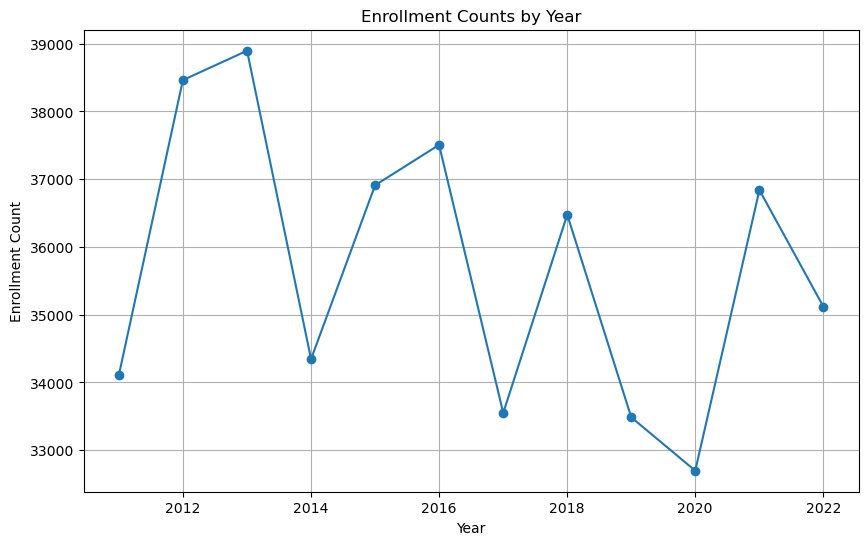

In [19]:
enrollment_by_year = df.groupby('year')['enrollment_count'].sum() # Group by year and sum the enrollment counts

plt.figure(figsize=(10, 6))
plt.plot(enrollment_by_year.index, enrollment_by_year.values, marker='o')
plt.title('Enrollment Counts by Year')
plt.xlabel('Year')
plt.ylabel('Enrollment Count')
plt.grid(True)
plt.show()